In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
test=pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
gender=pd.read_csv("gender_submission.csv")
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [29]:
merged_train = train.merge(gender, on='PassengerId', how='left')

In [30]:
merged_test = test.merge(gender, on='PassengerId', how='left')


In [31]:
df = pd.concat([merged_train, merged_test], ignore_index=True)
df.head()


,PassengerId,Survived_x,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_y,Survived
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [32]:
df.columns

Index(['PassengerId', 'Survived_x', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_y',
       'Survived'],
      dtype='object')

In [33]:
df.isnull().sum()

PassengerId       0
Survived_x      418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived_y     1309
Survived        891
dtype: int64

In [34]:
#here we first sorted the int and float values columns and fill them with mean 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [35]:
#This code is filling missing values in categorical columns with the string 'Unknown'.
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

In [36]:
df.isnull().sum()

PassengerId       0
Survived_x        0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Survived_y     1309
Survived          0
dtype: int64

In [37]:
for i in df.columns:
    df[i]=pd.to_numeric(df[i],errors="ignore")

In [38]:
df.dtypes

PassengerId      int64
Survived_x     float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived_y     float64
Survived       float64
dtype: object

In [39]:
for i in df.columns:
    if df[i].dtypes=="O":
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [40]:
df.isnull().sum()

PassengerId       0
Survived_x        0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Survived_y     1309
Survived          0
dtype: int64

In [41]:
df['Survived_y'].fillna('0', inplace=True)


In [42]:
df.isnull().sum()

PassengerId    0
Survived_x     0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived_y     0
Survived       0
dtype: int64

In [43]:
mean = df.mean()
mean

C:\Users\Dell\AppData\Local\Temp\ipykernel_744\2523297653.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()


PassengerId    655.000000
Survived_x       0.383838
Pclass           2.294882
Age             29.881138
SibSp            0.498854
Parch            0.385027
Fare            33.295479
Survived_y       0.000000
Survived         0.363636
dtype: float64

In [44]:
median = df.median()
median

C:\Users\Dell\AppData\Local\Temp\ipykernel_744\1236989899.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()


PassengerId    655.000000
Survived_x       0.383838
Pclass           3.000000
Age             29.881138
SibSp            0.000000
Parch            0.000000
Fare            14.454200
Survived_y       0.000000
Survived         0.363636
dtype: float64

In [45]:
mode = stats.mode(df)
mode

C:\Users\Dell\AppData\Local\Temp\ipykernel_744\3821255368.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(df)
C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\Dell\AppData\Local\Temp\ipykernel_744\3821255368.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([[1, 0.0, 3, 'Connolly, Miss. Kate', 'male', 29.881137667304014, 0,
        0, 'CA. 2343', 8.05, 'Unknown', 'S', '0', 0.36363636363636365]],
      dtype=object), count=array([[   1,  549,  709,    2,  843,  263,  891, 1002,   11,   60, 1014,
         914, 1309,  891]]))

In [46]:
std=df.std()
std

C:\Users\Dell\AppData\Local\Temp\ipykernel_744\2791382507.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std=df.std()


PassengerId    378.020061
Survived_x       0.401381
Pclass           0.837836
Age             12.883193
SibSp            1.041658
Parch            0.865560
Fare            51.738879
Survived         0.271938
dtype: float64

In [49]:
df.columns

Index(['PassengerId', 'Survived_x', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_y',
       'Survived'],
      dtype='object')

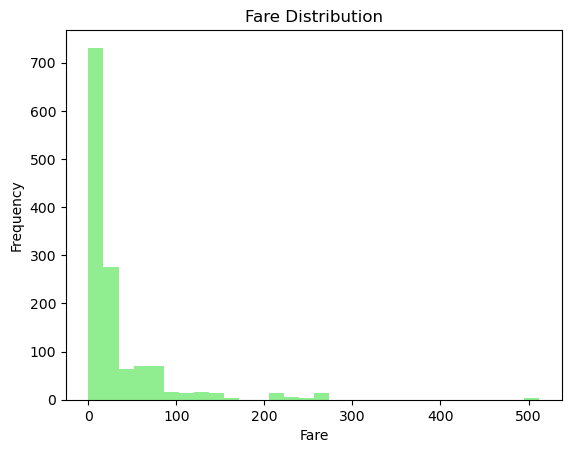

In [60]:
#Histogram of Fare:
plt.hist(df['Fare'], bins=30, color='lightgreen')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()

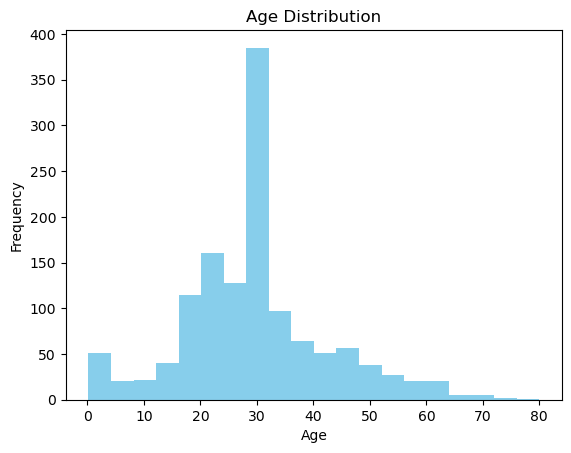

In [63]:
#Histogram of Ages:
plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

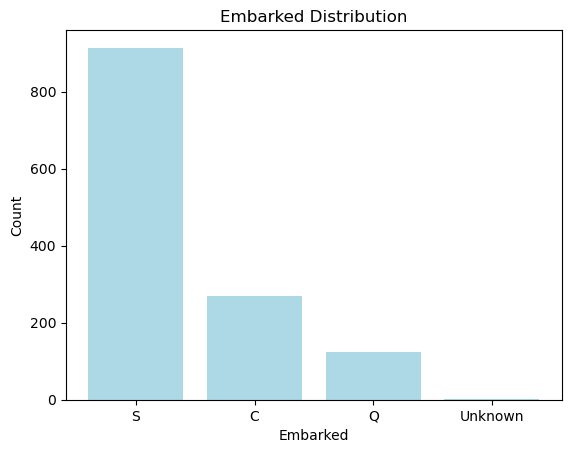

In [62]:
#Bar Chart for Embarked:
embarked_counts = df['Embarked'].value_counts()
plt.bar(embarked_counts.index, embarked_counts.values, color='lightblue')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked Distribution')
plt.show()

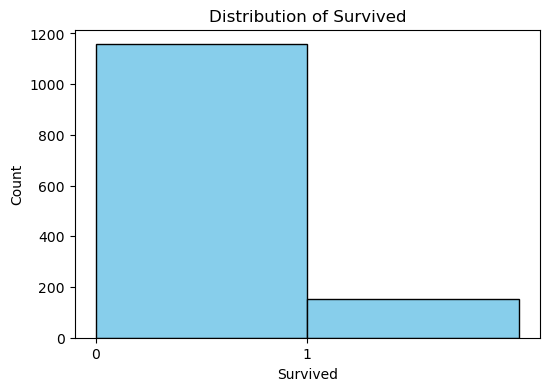

In [52]:
# Chart 1: Histogram for 'Survived_x'
plt.figure(figsize=(6, 4))
plt.hist(df['Survived'], bins=[0, 1, 2], edgecolor='k', color='skyblue')
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

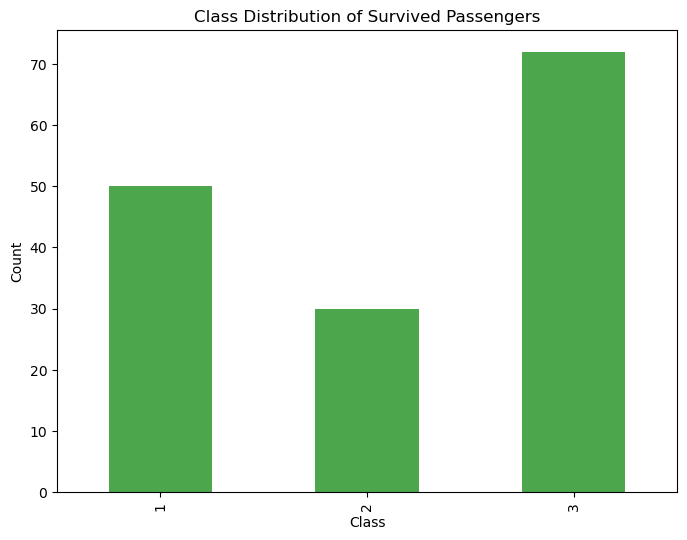

In [53]:
# Create a bar chart for 'Pclass' of passengers who survived
plt.figure(figsize=(8, 6))
survived_pclass = df[df['Survived'] == 1]['Pclass'].value_counts().sort_index()
survived_pclass.plot(kind='bar', color='green', alpha=0.7)
plt.title('Class Distribution of Survived Passengers')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

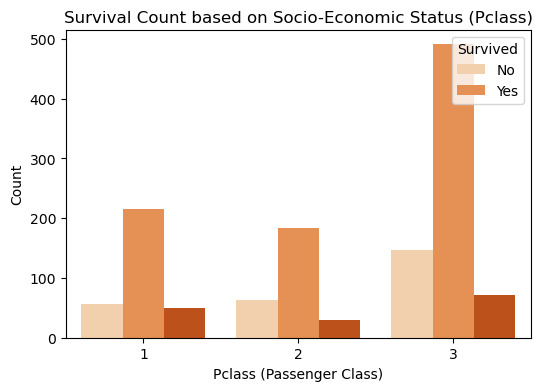

In [66]:
# Visualizing survival based on socio-economic status (Pclass)
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Oranges')
plt.title('Survival Count based on Socio-Economic Status (Pclass)')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()



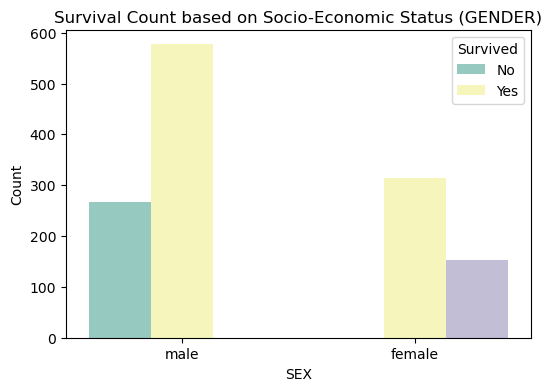

In [68]:
# Visualizing survival based on socio-economic status (Gender)
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set3')
plt.title('Survival Count based on Socio-Economic Status (GENDER)')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

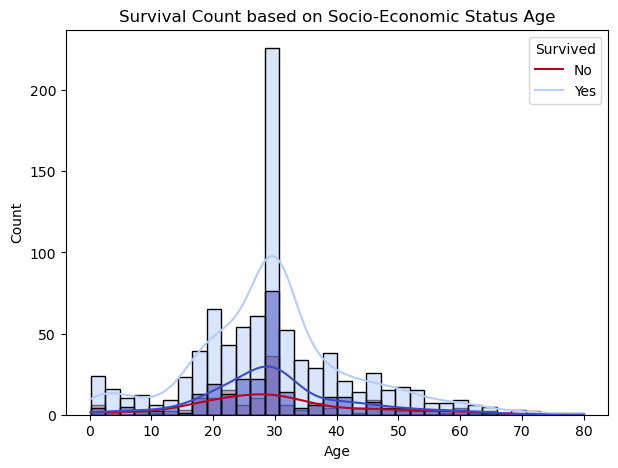

In [69]:
# Visualizing survival based on socio-economic status (age)
plt.figure(figsize=(7, 5))
sns.histplot(x='Age', hue='Survived', data=df, kde=True, palette='coolwarm')
plt.title('Survival Count based on Socio-Economic Status Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

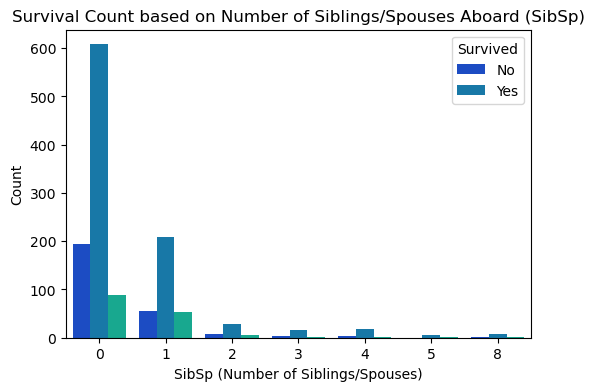

In [70]:
# Visualizing survival based on socio-economic status (siblings/spouses aboard (SibSp))
plt.figure(figsize=(6, 4))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='winter')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp (Number of Siblings/Spouses)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

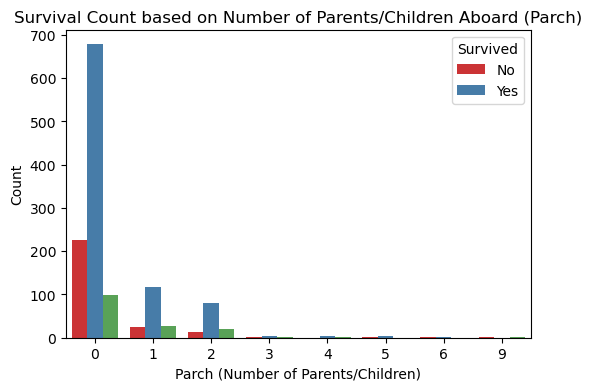

In [72]:
# Visualizing survival based on socio-economic status (number of parents/children aboard (Parch))
plt.figure(figsize=(6, 4))
sns.countplot(x='Parch', hue='Survived', data=df, palette='Set1')
plt.title('Survival Count based on Number of Parents/Children Aboard (Parch)')
plt.xlabel('Parch (Number of Parents/Children)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()